In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('summary.csv')

In [3]:
baseline = df.iloc[0]
print(baseline)

status                                   ok
partition1                                1
partition2                                1
bench          gemm-2d-partitioned:gemm-0-0
bram_used                                44
dsp_used                                  3
lut_used                               1578
lutmem_used                             137
reg_used                               2719
uram_used                                 0
runtime_avg                         10.4045
runtime_std                       0.0097802
Name: 0, dtype: object


In [4]:
info_keys = [ 
    'partition1',
    'partition2',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'reg_used',
    'dsp_used',
    'runtime_avg',
]

In [5]:
df['total_partition'] = df.apply(lambda row: (row['partition1'] * row['partition2']), axis=1)
p = df.copy().pivot('partition1', 'partition2', 'lut_used')
p

partition2,1,2,4
partition1,,,
1,1578,1593,1602
2,1516,1514,1548
4,1540,1573,1757


<Figure size 432x288 with 0 Axes>

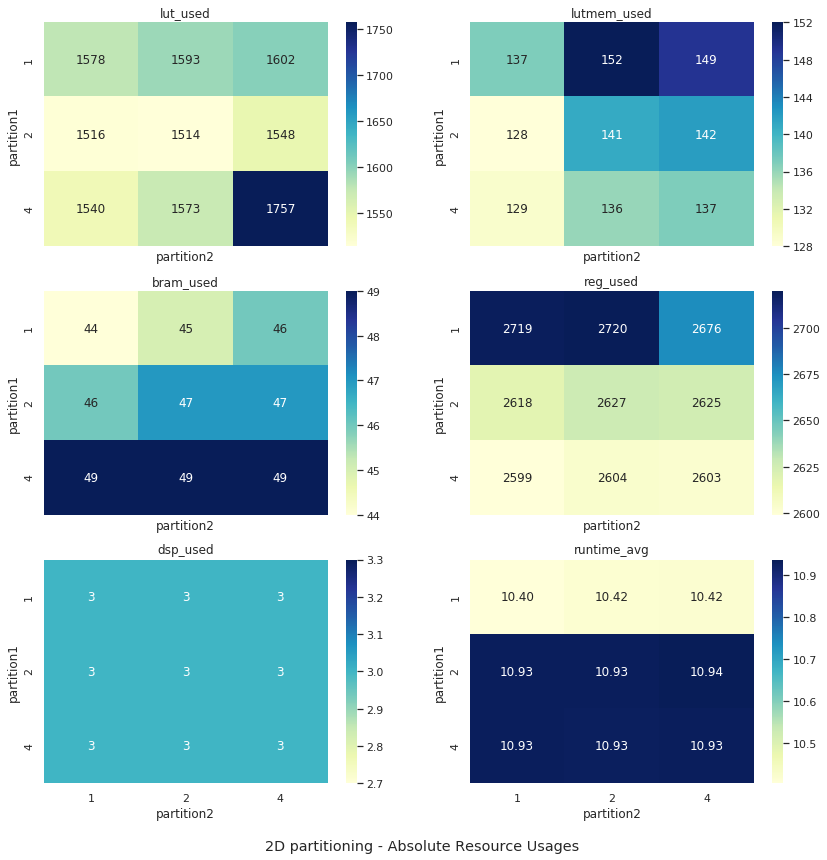

In [6]:
plt.figure()
sns.set()
sns.set_palette('muted')

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)
pal = sns.color_palette('husl', 3)
akws = {"ha": 'left',"va": 'top'}

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    pv = df.copy().pivot('partition1', 'partition2', key)
    sns.heatmap(pv, ax=ax, cmap="YlGnBu", annot=True, fmt='.2f' if key=='runtime_avg' else '.0f')
    ax.title.set_text(key)
    
fig.suptitle('2D partitioning - Absolute Resource Usages', y=0.07)

fig.savefig('absolute.png', dpi=300)